# Code to import CSV file

In [1]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


# Importing Basic Libraries :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("salary.csv")
#a = pd.read_csv("salary.csv")

In [4]:
df

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1114,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1028,1116,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1029,1117,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
1030,1118,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1


# Unwanted Column Removing :

In [5]:
df.drop(["Unnamed: 0"], axis=1,inplace = True)

# Missing value :

In [6]:
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

# Data Type :

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1032 non-null   int64 
 1   Workclass       1032 non-null   object
 2   fnlwgt          1032 non-null   int64 
 3   education       1032 non-null   object
 4   education-num   1032 non-null   int64 
 5   marital-status  1032 non-null   object
 6   occupation      1032 non-null   object
 7   relationship    1032 non-null   object
 8   race            1032 non-null   object
 9   sex             1032 non-null   object
 10  capital-gain    1032 non-null   int64 
 11  capital-loss    1032 non-null   int64 
 12  hours-per-week  1032 non-null   int64 
 13  native-country  1032 non-null   object
 14  Income          1032 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 121.1+ KB


# Seprating Categorical & Numaric Column :

In [8]:
cat_col = ["sex","occupation","marital-status","relationship","Workclass","education","race","native-country"]

In [9]:
cat_col

['sex',
 'occupation',
 'marital-status',
 'relationship',
 'Workclass',
 'education',
 'race',
 'native-country']

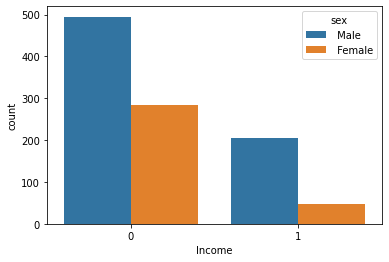

------------------------------------------


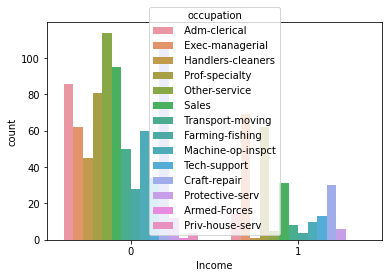

------------------------------------------


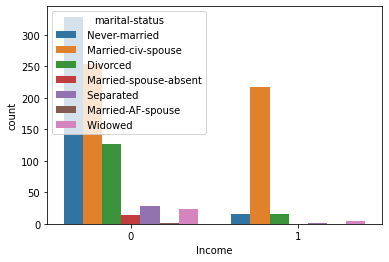

------------------------------------------


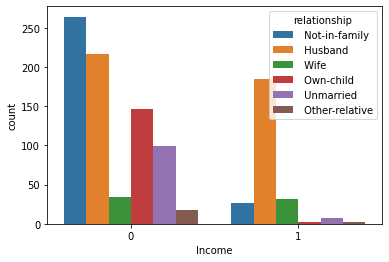

------------------------------------------


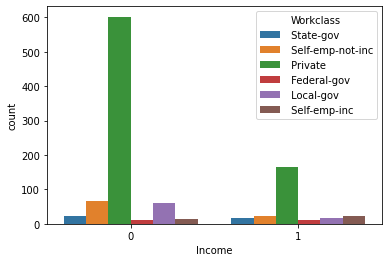

------------------------------------------


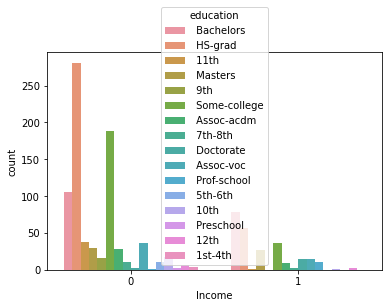

------------------------------------------


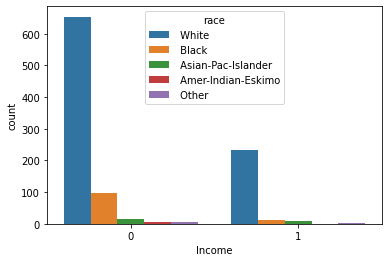

------------------------------------------


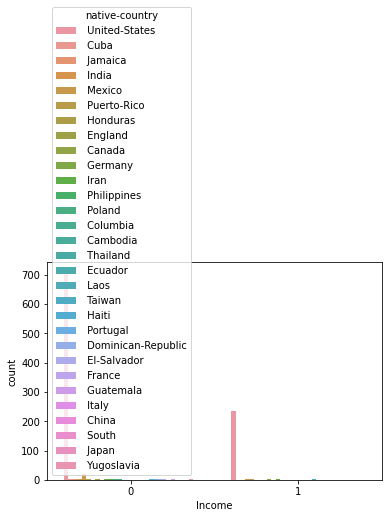

------------------------------------------


In [10]:
for col in cat_col:
  plt.figure()
  sns.countplot(data=df,x="Income", hue=col)  
  plt.show()
  print("------------------------------------------")

In [11]:
num_col = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]

In [12]:
num_col

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

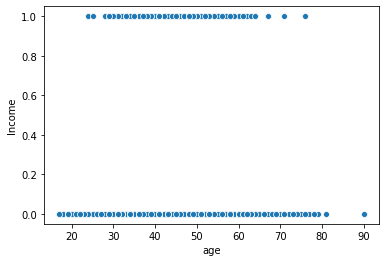

-------------------------------------------


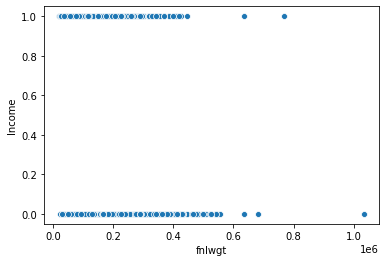

-------------------------------------------


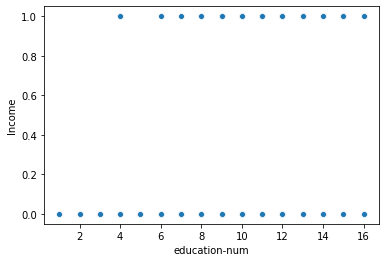

-------------------------------------------


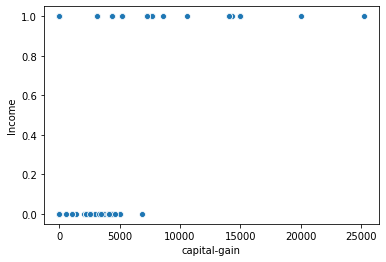

-------------------------------------------


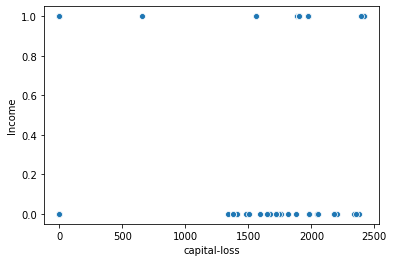

-------------------------------------------


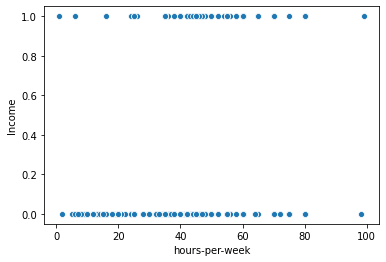

-------------------------------------------


In [14]:
for col in num_col:
  plt.figure()
  sns.scatterplot(data=df, x=col, y="Income")
  plt.show()
  print("-------------------------------------------")  

In [15]:
df_num = df.select_dtypes(["float64","int64"])

In [16]:
df_num

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
1027,34,290763,9,0,0,40,0
1028,36,51100,10,0,0,40,0
1029,41,227644,9,0,0,50,0
1030,58,205267,13,0,0,40,1


In [17]:
df_cat = df.select_dtypes(object)

In [18]:
df_cat

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
1027,Private,HS-grad,Divorced,Handlers-cleaners,Own-child,White,Female,United-States
1028,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
1029,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
1030,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States


# Baseline Model :

In [19]:
le = LabelEncoder()

In [21]:
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

In [22]:
df_cat

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...
1027,2,11,0,5,3,4,0,28
1028,2,15,2,2,0,4,1,28
1029,2,11,2,13,0,4,1,28
1030,1,9,2,9,5,4,0,28


In [23]:
df = pd.concat([df_cat,df_num],axis=1)

In [24]:
df

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,5,9,4,0,1,4,1,28,39,77516,13,2174,0,40,0
1,4,9,2,3,0,4,1,28,50,83311,13,0,0,13,0
2,2,11,0,5,1,4,1,28,38,215646,9,0,0,40,0
3,2,1,2,5,0,2,1,28,53,234721,7,0,0,40,0
4,2,9,2,9,5,2,0,4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2,11,0,5,3,4,0,28,34,290763,9,0,0,40,0
1028,2,15,2,2,0,4,1,28,36,51100,10,0,0,40,0
1029,2,11,2,13,0,4,1,28,41,227644,9,0,0,50,0
1030,1,9,2,9,5,4,0,28,58,205267,13,0,0,40,1


In [26]:
def train_model(X_train,X_test):
  log = LogisticRegression()
  log.fit(X_train,y_train)
  y_pred = log.predict(X_test)
  print(classification_report(y_test,y_pred))

In [27]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
train_model(X_train,X_test)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.68      0.26      0.38        72

    accuracy                           0.80       310
   macro avg       0.75      0.61      0.63       310
weighted avg       0.78      0.80      0.76       310



# Chi2 and Anova Test :

chi2 :

In [31]:
#chi2
from sklearn.feature_selection import chi2
# ANOVA
from sklearn.feature_selection import f_regression
# common function for both
from sklearn.feature_selection import SelectKBest

In [32]:
chi2 = SelectKBest(score_func=chi2,k=10)

In [33]:
X_train_chi = chi2.fit_transform(X_train,y_train)

In [34]:
X_test_chi = chi2.transform(X_test)

In [35]:
train_model(X_train_chi,X_test_chi)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       238
           1       0.62      0.22      0.33        72

    accuracy                           0.79       310
   macro avg       0.71      0.59      0.60       310
weighted avg       0.76      0.79      0.75       310



In [36]:
chi2.scores_

array([1.60667219e+00, 6.46272080e-01, 2.85524856e+01, 2.69228910e-01,
       4.28508247e+01, 6.51262333e-01, 3.88273433e+00, 5.29629278e-02,
       1.43215169e+02, 2.08905154e+04, 4.51886417e+01, 7.86853758e+05,
       1.98133155e+04, 1.23675492e+02])

In [37]:
df.columns

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'age', 'fnlwgt',
       'education-num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'Income'],
      dtype='object')

In [38]:
chi2.get_support()

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True])

Anova :

In [39]:
anova = SelectKBest(score_func=f_regression,k=4)

In [40]:
X_train_f = anova.fit_transform(X_train,y_train)
X_test_f = anova.transform(X_test)

In [41]:
train_model(X_train_f,X_test_f)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       238
           1       0.69      0.35      0.46        72

    accuracy                           0.81       310
   macro avg       0.76      0.65      0.67       310
weighted avg       0.80      0.81      0.79       310



In [42]:
anova.scores_

array([ 3.855057  ,  0.51247514, 34.01671063,  0.10304801, 24.01569722,
        3.22653221, 12.36335806,  0.08849767, 35.87430298,  0.34703723,
       87.75938546, 86.66744615, 11.18286257, 40.91992553])

In [44]:
df.columns

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'age', 'fnlwgt',
       'education-num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'Income'],
      dtype='object')

In [45]:
anova.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False,  True])

# Wrapper Method (Forward Selection) :


In [46]:
features = df.columns.tolist()[:-1]

In [47]:
features

['Workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [48]:
cols = []

In [50]:
for col in features:
  cols.append(col)
  X = df[cols]
  y = df["Income"]
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
  log = LogisticRegression()
  log.fit(X_train,y_train)
  y_pred = log.predict(X_test)
  print(col,"----> precision: ",precision_score(y_test,y_pred),"recall: ",recall_score(y_test,y_pred))

Workclass ----> precision:  0.0 recall:  0.0
education ----> precision:  0.0 recall:  0.0
marital-status ----> precision:  0.0 recall:  0.0
occupation ----> precision:  0.0 recall:  0.0
relationship ----> precision:  0.0 recall:  0.0
race ----> precision:  0.0 recall:  0.0
sex ----> precision:  0.0 recall:  0.0
native-country ----> precision:  0.0 recall:  0.0
age ----> precision:  0.2 recall:  0.041666666666666664
fnlwgt ----> precision:  0.0 recall:  0.0
education-num ----> precision:  0.0 recall:  0.0
capital-gain ----> precision:  0.5666666666666667 recall:  0.2361111111111111
capital-loss ----> precision:  0.6666666666666666 recall:  0.25
hours-per-week ----> precision:  0.6785714285714286 recall:  0.2638888888888889


# Principal Component Analysis :

In [51]:
from sklearn.decomposition import PCA

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [53]:
pca = PCA(n_components=5,random_state=1)

In [54]:
X_train_pca = pca.fit_transform(X_train)

In [55]:
X_test_pca = pca.transform(X_test)

In [56]:
train_model(X_train_pca,X_test_pca)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       238
           1       0.57      0.46      0.51        72

    accuracy                           0.79       310
   macro avg       0.71      0.68      0.69       310
weighted avg       0.78      0.79      0.79       310



In [57]:
components = pca.components_

In [59]:
components[0]

array([ 3.40042108e-07, -1.33962105e-06,  6.89948962e-07, -2.67201320e-07,
        9.49268155e-07, -7.71548627e-07, -6.75004521e-08, -2.64531132e-06,
       -7.24832430e-06,  9.99999750e-01, -1.41921124e-06,  7.07377252e-04,
       -1.95570803e-05, -8.45583433e-06])

In [60]:
df.columns

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'age', 'fnlwgt',
       'education-num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'Income'],
      dtype='object')

In [61]:
components[1]

array([-4.10236592e-06,  3.49832297e-05, -4.88315133e-05, -4.36540333e-05,
       -7.08592082e-05,  2.66548473e-05,  4.54902444e-06,  5.74320323e-05,
        3.85812993e-04, -7.07522637e-04,  1.56328738e-04,  9.99953258e-01,
       -9.60468184e-03,  7.37797432e-04])